# ***Research on Breast cancer***
*This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements*


In [1]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
bc = pd.read_csv(url)
bc.columns=["code-number",
            "ClumpThick",
            "Unicell",
            "Unicellshape",
            "Marg-ad",
            "Sin-Empi-cell-size",
            "Bare-Nucl",
            "Blnd-Chrom",
            "Nor-Nucl",
           "Mito",
           "class"]
bc.to_csv("data.csv",index=None,header=True)

In [2]:
bc.isnull().sum()

code-number           0
ClumpThick            0
Unicell               0
Unicellshape          0
Marg-ad               0
Sin-Empi-cell-size    0
Bare-Nucl             0
Blnd-Chrom            0
Nor-Nucl              0
Mito                  0
class                 0
dtype: int64

# ***Preprocssing dataset...***

In [3]:
#bc['Bare-Nucl'] = bc['Bare-Nucl'].replace(['?'],[np.nan])
# bc.iloc[[22]]
df = pd.read_csv('data.csv',  na_values = "?")
# df.iloc[[22]]
df.head(30)

,code-number,ClumpThick,Unicell,Unicellshape,Marg-ad,Sin-Empi-cell-size,Bare-Nucl,Blnd-Chrom,Nor-Nucl,Mito,class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
5,1018099,1,1,1,1,2,10.0,3,1,1,2
6,1018561,2,1,2,1,2,1.0,3,1,1,2
7,1033078,2,1,1,1,2,1.0,1,1,5,2
8,1033078,4,2,1,1,2,1.0,2,1,1,2
9,1035283,1,1,1,1,1,1.0,3,1,1,2


In [4]:
df.isnull().sum()

code-number            0
ClumpThick             0
Unicell                0
Unicellshape           0
Marg-ad                0
Sin-Empi-cell-size     0
Bare-Nucl             16
Blnd-Chrom             0
Nor-Nucl               0
Mito                   0
class                  0
dtype: int64

In [5]:
Mean = print("Mean of Bare Nuclei :",df['Bare-Nucl'].mean())
Median = print("Median of Bare Nuclei :",df['Bare-Nucl'].median())
Mode = print("Mode of Bare Nuclei :",df['Bare-Nucl'].mode())

Mean of Bare Nuclei : 3.5483870967741935
Median of Bare Nuclei : 1.0
Mode of Bare Nuclei : 0    1.0
dtype: float64


In [6]:
udf = df.fillna(df['Bare-Nucl'].median())
udf.iloc[[22]]

,code-number,ClumpThick,Unicell,Unicellshape,Marg-ad,Sin-Empi-cell-size,Bare-Nucl,Blnd-Chrom,Nor-Nucl,Mito,class
22,1057013,8,4,5,1,2,1.0,7,3,1,4


In [7]:
udf.isnull().sum()

code-number           0
ClumpThick            0
Unicell               0
Unicellshape          0
Marg-ad               0
Sin-Empi-cell-size    0
Bare-Nucl             0
Blnd-Chrom            0
Nor-Nucl              0
Mito                  0
class                 0
dtype: int64

In [8]:
#check for diffrent categories 
udf['class'].unique() 

array([2, 4])

In [9]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
udf['class']= label_encoder.fit_transform(udf['class']) 
  
udf['class'].unique() # 0 = benign / 1 = malignant
"""
Some tumors are benign, which means they form in only one spot without spreading to surrounding tissue.
Malignant tumors are cancerous and can spread to nearby tissue.
As cancerous tumors grow, cancer cells can break off and travel throughout the body, forming new tumors.
"""

'\nSome tumors are benign, which means they form in only one spot without spreading to surrounding tissue.\nMalignant tumors are cancerous and can spread to nearby tissue.\nAs cancerous tumors grow, cancer cells can break off and travel throughout the body, forming new tumors.\n'

# ***Visulization***

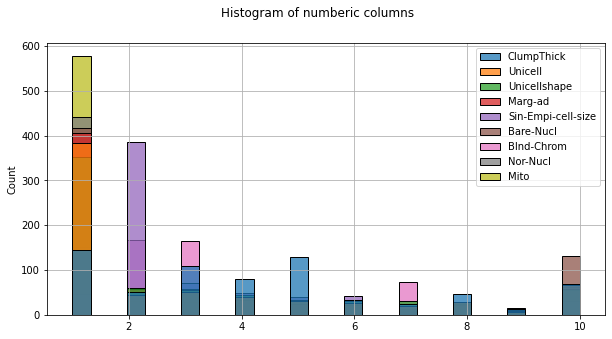

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

dfn = udf.iloc[0:,1:10]

plt.figure(figsize=(10,5))
plt.suptitle('Histogram of numberic columns')
sns.histplot(data=dfn,kde=False)
plt.grid()
plt.show()

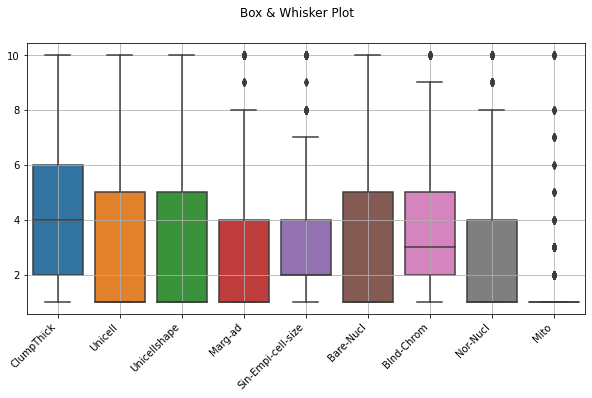

In [11]:
plt.figure(figsize=(10,5))
plt.suptitle('Box & Whisker Plot')
ax= sns.boxplot(data=dfn)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.grid()
plt.show()

Total Number of Sample :698

***count of benign and malignant***
2    457
4    241
Name: class, dtype: int64


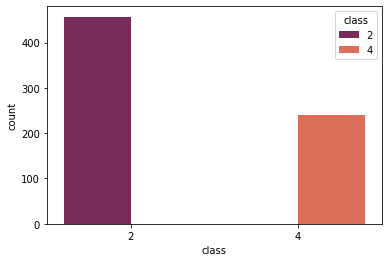

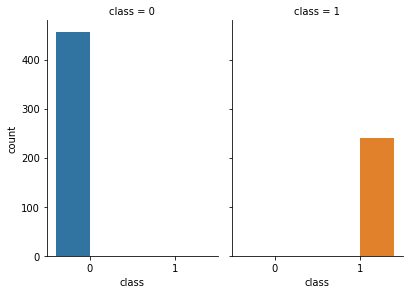

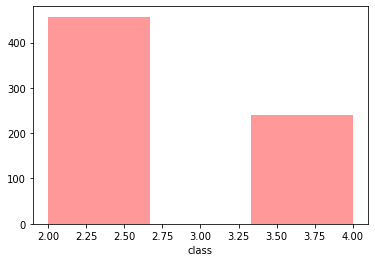

In [12]:
import warnings
warnings.filterwarnings("ignore")

print("Total Number of Sample :" +str(df['class'].count()))
print()
print("***count of benign and malignant***")
print(df['class'].value_counts())

ax = sns.countplot(x="class", hue="class", data=df,palette="rocket")
g = sns.catplot(x="class", hue="class", col="class",
                data=udf, kind="count",
                height=4, aspect=.7);

q2 = df [ df['class']=="2" ]
plt.figure()
sns.distplot(df['class'], bins=3,kde=False, color='r')
plt.show()

In [13]:
# #tabulate and 
# import utils
# # check outlier index
# print('\n*** Outlier Index ***')
# print(utils.OutlierIndex(dfn))

# # check outlier values
# print('\n*** Outlier Values ***')
# print(utils.OutlierValues(dfn))
# df['class'].unique()

# if df['class'].any()== 2:
#   print("benign")

#Using matplotlib


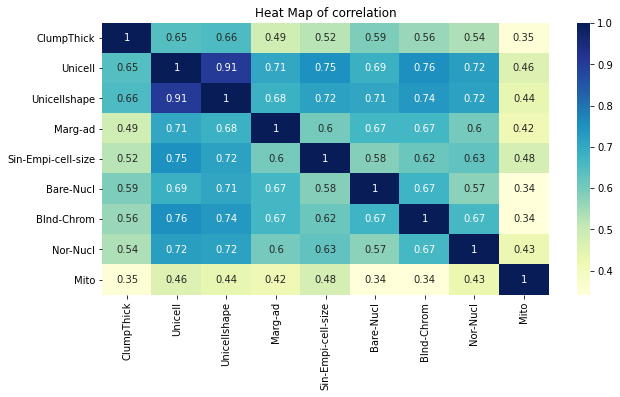

In [14]:
df.corr()
plt.figure(figsize=(10,5))
plt.title('Heat Map of correlation')
ax = sns.heatmap(dfn.corr(), annot=True, cmap="YlGnBu")
plt.show()


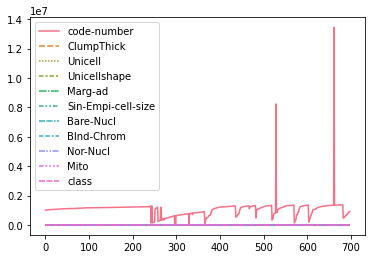

In [15]:
sns.lineplot(data=df)

# ***Training the model***

In [25]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(udf.columns)
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['features','Score']  #naming the dataframe columns
# print(featureScores)
# print(featureScores.nlargest(3,'Score')) 

In [18]:
dff = pd.read_csv(url).replace('?',0)
x=dff.iloc[:,0:10].values
y=dff.iloc[:,10].values

#now splitng data into training and testing of data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_x,train_y)

lg.score(train_x,train_y)

0.6639344262295082

In [ ]:
# import numpy as np
# X = np.array(udf.drop(["class"],axis = 1))
# Y = np.array (udf["class"])

# from sklearn.model_selection import train_test_split
# train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.1,random_state=0)

# from sklearn.svm import SVR
# model = SVR(kernel='linear')
# model.fit(train_x,train_y)

# model.score(train_x,train_y)

In [ ]:
gf = pd.read_csv(url)

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 , random_state=707)
forest.fit(train_x,train_y)
forest.score(train_x,train_y)

0.9979508196721312

In [20]:
len(forest.estimators_)

10

[Text(451.5394736842105, 1026.8, 'X[7] <= 3.5\ngini = 0.436\nsamples = 300\nvalue = [331, 157]'),
 Text(242.28947368421052, 906.0, 'X[3] <= 3.5\ngini = 0.176\nsamples = 210\nvalue = [314, 34]'),
 Text(132.1578947368421, 785.2, 'X[8] <= 7.5\ngini = 0.019\nsamples = 189\nvalue = [305, 3]'),
 Text(88.10526315789474, 664.4, 'X[4] <= 2.5\ngini = 0.007\nsamples = 188\nvalue = [305, 1]'),
 Text(44.05263157894737, 543.6, 'gini = 0.0\nsamples = 175\nvalue = [289, 0]'),
 Text(132.1578947368421, 543.6, 'X[3] <= 2.5\ngini = 0.111\nsamples = 13\nvalue = [16, 1]'),
 Text(88.10526315789474, 422.79999999999995, 'gini = 0.0\nsamples = 12\nvalue = [16, 0]'),
 Text(176.21052631578948, 422.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(176.21052631578948, 664.4, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(352.42105263157896, 785.2, 'X[4] <= 1.5\ngini = 0.349\nsamples = 21\nvalue = [9, 31]'),
 Text(264.3157894736842, 664.4, 'X[2] <= 2.5\ngini = 0.472\nsamples = 11\nvalue = [8, 13]'

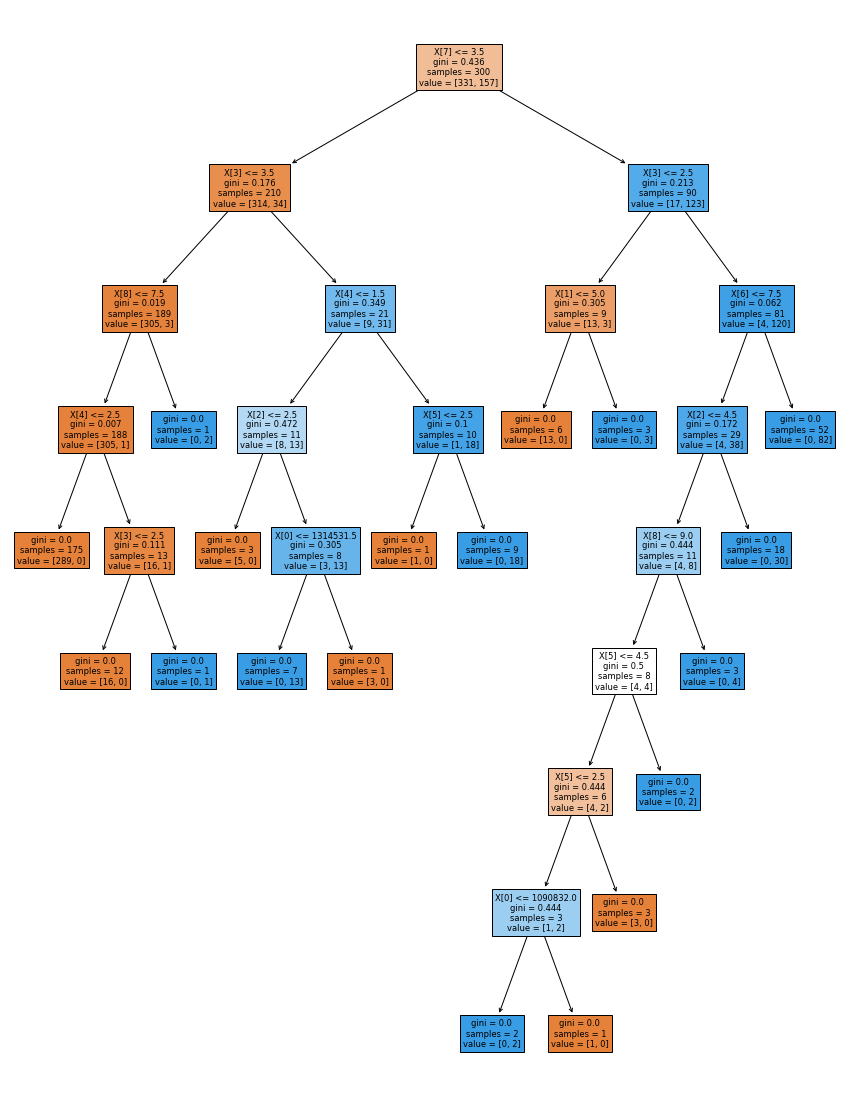

In [21]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(forest.estimators_[9],filled=True)

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier( criterion = 'entropy',random_state= 0)
tree.fit(train_x,train_y)
print(tree.score(train_x,train_y))

1.0


In [23]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10 , random_state=707)
# scores = cross_val_score(clf, train_x,train_y, cv=5)
# scores
clf.fit(train_x,train_y)
clf.score(train_x,train_y)

0.9979508196721312

In [24]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
bf = SelectKBest(score_func=chi2, k=10)
fit = bf.fit(train_x,train_y)
fit

SelectKBest(k=10, score_func=<function chi2 at 0x7fc1c151a560>)